In [1]:
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import numpy for numerical operations and array handling
import matplotlib.pyplot as plt  # Import matplotlib for creating visualizations
import seaborn as sns  # Import seaborn for advanced statistical visualizations

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.model_selection import train_test_split, cross_val_score  # Import functions for splitting data and cross-validation
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TF-IDF vectorizer for text feature extraction
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report, roc_auc_score  # Import metrics for model evaluation
from sklearn.neural_network import MLPClassifier  # Import Multi-layer Perceptron classifier
from imblearn.over_sampling import SVMSMOTE  # Import SVMSMOTE for handling imbalanced datasets
import nltk  # Import NLTK library for natural language processing
from nltk.tokenize import word_tokenize  # Import word tokenizer
from nltk.corpus import stopwords  # Import stopwords list
from nltk.stem import WordNetLemmatizer  # Import lemmatizer
from nltk.probability import FreqDist  # Import frequency distribution for token frequency analysis
from bs4 import BeautifulSoup
from sklearn.utils import shuffle  # Import shuffle utility
from tensorflow.keras.models import Sequential  # Import Sequential model for LSTM
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding  # Import LSTM, Dense, Dropout, and Embedding layers for neural network
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Import pad_sequences for padding sequences to the same length
from tensorflow.keras.preprocessing.text import Tokenizer  # Import Tokenizer for converting text to sequences

In [6]:
import nltk

nltk.download('punkt')  # Download the tokenizer models
nltk.download('stopwords')  # Download the list of stopwords
nltk.download('wordnet')  # Download the WordNet lexicon for lemmatization

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anuli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anuli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
import pandas as pd

import pandas as pd

train = pd.read_csv("C:\\Users\\anuli\\OneDrive\\Desktop\\Multi Label Absuive Comments Identification\\Datasets\\train.csv")  # Load the training data from CSV file
test = pd.read_csv("C:\\Users\\anuli\\OneDrive\\Desktop\\Multi Label Absuive Comments Identification\\Datasets\\test.csv")  # Load the test data from CSV file
sample = pd.read_csv("C:\\Users\\anuli\\OneDrive\\Desktop\\Multi Label Absuive Comments Identification\\Datasets\\sample_submission.csv")  # Load the sample submission file from CSV

In [8]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [9]:
target_columns = list(sample.columns.drop('id'))  # Get a list of all column names in the sample DataFrame except 'id'
target_columns  # Display the list of target columns

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [10]:
train[target_columns].sum()  # Calculate the sum of each target column in the training data to check for label imbalance
# The counts will indicate the distribution of labels and show if the dataset is imbalanced

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [11]:
pip install imbalanced-learn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
train['non-toxic'] = 1 - train[target_columns].max(axis=1)  # Create a column 'non-toxic' indicating if a sample is not labeled as toxic

train['toxicity_type_defined'] = train[['insult', 'obscene', 'identity_hate', 'threat']].max(axis=1)  # Define 'toxicity_type_defined' based on the maximum value among specific toxicity types

train['toxic_undefined'] = 0  # Initialize 'toxic_undefined' column with 0
train.loc[(train['toxicity_type_defined'] == 0) & (train['toxic'] == 1), 'toxic_undefined'] = 1  # Set 'toxic_undefined' to 1 where 'toxicity_type_defined' is 0 but 'toxic' is 1

train['soft_toxic'] = 0  # Initialize 'soft_toxic' column with 0
train.loc[(train['toxicity_type_defined'] == 1) & (train['toxic'] == 0), 'soft_toxic'] = 1  # Set 'soft_toxic' to 1 where 'toxicity_type_defined' is 1 but 'toxic' is 0

analysis_columns = target_columns + ['non-toxic', 'toxic_undefined', 'soft_toxic']  # List of columns for analysis, including new columns created

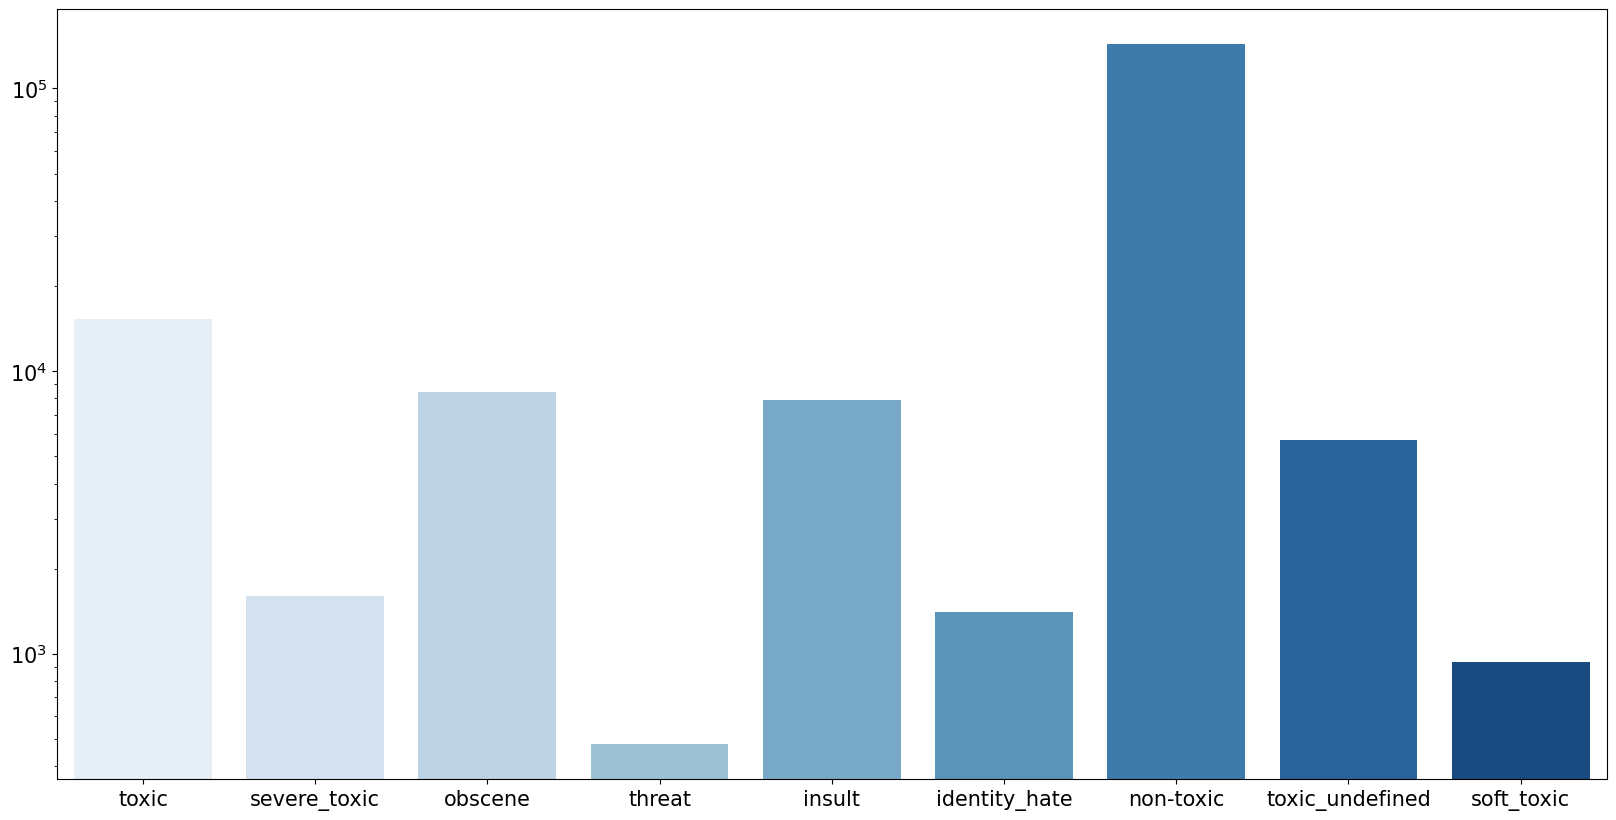

In [13]:
label_counts = train[analysis_columns].sum()  # Calculate the sum of values in each column for analysis

plt.figure(figsize=(20, 10))  # Set the figure size for the plot

# Create a bar plot with label counts
# Change the color of the bars to blue using a predefined palette
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='Blues')

ax.set_yscale("log")  # Set the y-axis to a logarithmic scale for better visualization of imbalances
ax.tick_params(labelsize=15)  # Adjust the size of the tick labels

plt.show()  # Display the plot

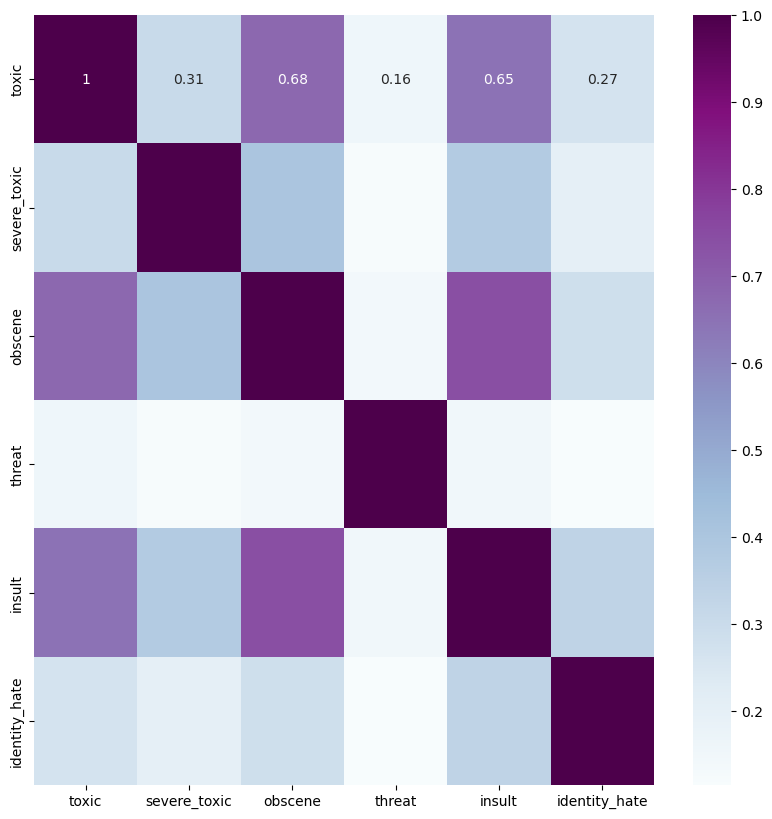

In [14]:
# Visualize any correlations between labels
heatmap_data = train[target_columns]  # Extract data for target columns to compute correlations

plt.figure(figsize=(10, 10))  # Set the figure size for the plot

# Create a heatmap to show correlations between labels
# Use a light color map such as 'BuPu' for a soft combination of blue and purple shades
ax = sns.heatmap(heatmap_data.corr(), cmap='BuPu', annot=True)

ax.tick_params(labelsize=10)  # Adjust the size of the tick labels

plt.show()  # Display the heatmap

In [15]:
train.loc[train['severe_toxic'] == 1, 'toxic'].sum()  # Calculate the sum of 'toxic' labels where 'severe_toxic' is 1

1595

In [16]:
print(type(train))  # Print the type of the 'train' object to confirm it is a DataFrame
print(train.columns)  # Print the column names of the 'train' DataFrame

<class 'pandas.core.frame.DataFrame'>
Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'non-toxic', 'toxicity_type_defined',
       'toxic_undefined', 'soft_toxic'],
      dtype='object')


In [17]:
# Define train_balanced
train_balanced = pd.concat([train[train['non-toxic'] == 1].sample(frac=0.11), train.loc[train['non-toxic'] == 0]])

# Shuffle the DataFrame
train_balanced = train_balanced.sample(frac=1)

# Define target_columns
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'soft_toxic']

In [18]:
train_balanced

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non-toxic,toxicity_type_defined,toxic_undefined,soft_toxic
62179,a656ffd7b46e017f,"""\n\nHHHHHAAAAAAAAAAAAAA!!!!!!!!!!!!!!!!!!!!!!...",1,0,0,0,1,0,0,1,0,0
4301,0b75a576bac7e620,"""\n\n I hate you. \n\nI hate you.\nI hate you!...",1,0,0,0,1,0,0,1,0,0
43729,74b9eed26fb95330,You are a fagget. I prey you get cancer and di...,1,0,1,0,1,0,0,1,0,0
52611,8cb35bcab1ff2f4f,"""== """"Goofs"""" Goof ==\n\nSpeaking of goofs, wh...",1,0,1,0,1,0,0,1,0,0
121067,87b370289464265c,"do you mean by seems to? More like does, dumba...",1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74147,c66190b1a6c2d7d6,A message from Shadow1: I am a wicked homosexu...,1,0,1,0,0,0,0,1,0,0
89333,eef49b7531464681,"""\nBecause 2011 is for internationally notable...",0,0,0,0,0,0,1,0,0,0
151383,7c2f9eb52228ed72,This just proves how little good faith you bri...,0,0,0,0,0,0,1,0,0,0
145526,1dfc064d988ba9d9,"URRRRRR \n\nHi! Chewbacca is quite the moron, ...",1,0,0,0,0,0,0,0,1,0


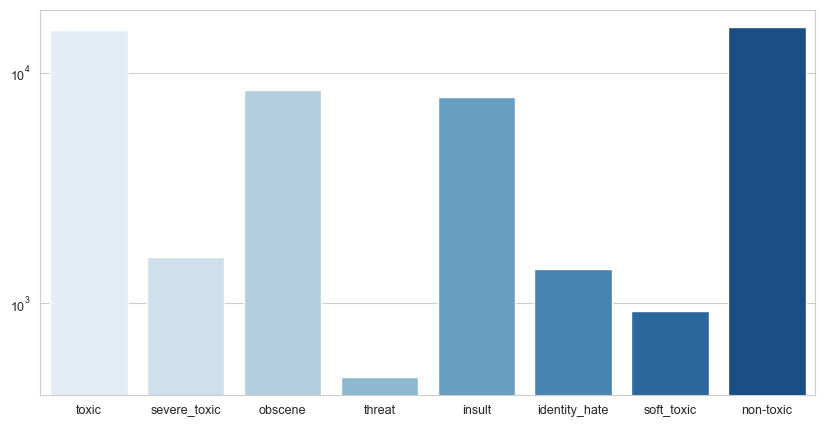

In [19]:
# Define train_balanced
train_balanced = pd.concat([train[train['non-toxic'] == 1].sample(frac=0.11), train.loc[train['non-toxic'] == 0]])

# Shuffle the DataFrame
train_balanced = train_balanced.sample(frac=1)

# Define target_columns
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'soft_toxic']

# Now you can proceed with using train_balanced and target_columns
label_counts = train_balanced[target_columns + ['non-toxic']].sum()
plt.figure(figsize=(10, 5))

# Set seaborn style to whitegrid
sns.set_style("whitegrid")

# Define blue color palette
blue_palette = sns.color_palette("Blues", len(label_counts))

# Create bar plot with blue theme
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=blue_palette)
ax.set_yscale("log")
ax.tick_params(labelsize=9)

# Show plot
plt.show()

In [20]:
!pip install spacy

In [21]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

all_tokens = []  # List to store tokenized words
lemmas = []  # List to store lemmatized words
nonstop_tokens = []  # List to store tokens after removing stopwords
total_number_of_tokens = []  # List to store total number of tokens in each text
number_of_sentences = []  # List to store number of sentences in each text
number_of_puncts = []  # List to store number of punctuation marks in each text

stop_words = set(stopwords.words('english'))  # Set of English stopwords
lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer

for text in train_balanced['comment_text']:
    # Tokenization
    tokens = word_tokenize(text.lower())  # Tokenize text and convert to lowercase
    all_tokens.append(tokens)
    
    # Lemmatization and stopword removal
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]  # Lemmatize and remove stopwords
    lemmas.append(lemmatized_tokens)
    
    # Non-stopword tokens
    nonstop_tokens.append([word for word in lemmatized_tokens if word not in stop_words])  # Store tokens that are not stopwords
    
    # Total number of tokens
    total_number_of_tokens.append(len(tokens))  # Count total number of tokens
    
    # Number of sentences
    number_of_sentences.append(len(nltk.sent_tokenize(text)))  # Count number of sentences
    
    # Number of punctuations
    number_of_puncts.append(len([char for char in text if char in string.punctuation]))  # Count number of punctuation marks

# Add new columns to the DataFrame
train_balanced['all_tokens'] = all_tokens
train_balanced['nonstop_tokens'] = nonstop_tokens
train_balanced['lemmas'] = lemmas
train_balanced['total_number_of_tokens'] = total_number_of_tokens
train_balanced['number_of_sentences'] = number_of_sentences
train_balanced['number_of_puncts'] = number_of_puncts

In [22]:
import numpy as np

log_max = np.log(train_balanced['total_number_of_tokens'].max())  # Calculate the logarithm of the maximum number of tokens
train_balanced['log_tokens'] = train_balanced['total_number_of_tokens']**(1/log_max)  # Apply a root transformation to the total number of tokens
upper = train_balanced['log_tokens'].max()  # Find the maximum value of the transformed 'log_tokens'
train_balanced['log_tokens_normalised'] = train_balanced['log_tokens'] / upper  # Normalize the transformed 'log_tokens' by dividing by the maximum value

# Note: Commented-out line appears incomplete and needs revision.
# helpful_log_max_root = df.Helpful_Votes**(1/log_maxlog_max

c:\Users\anuli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\anuli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\anuli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\anuli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\anuli\a

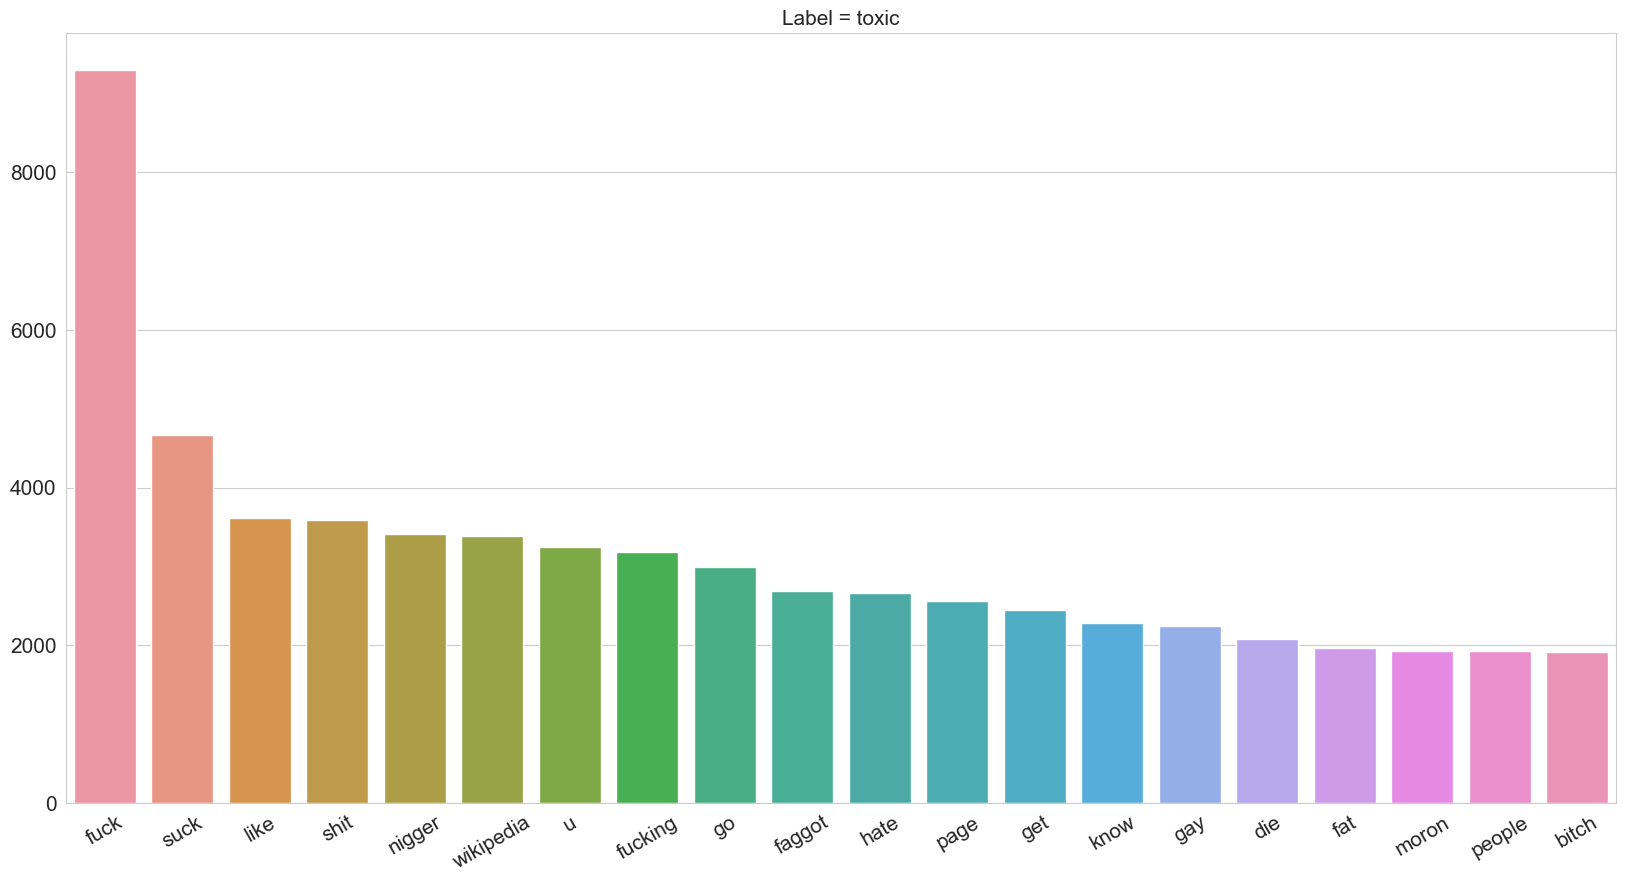

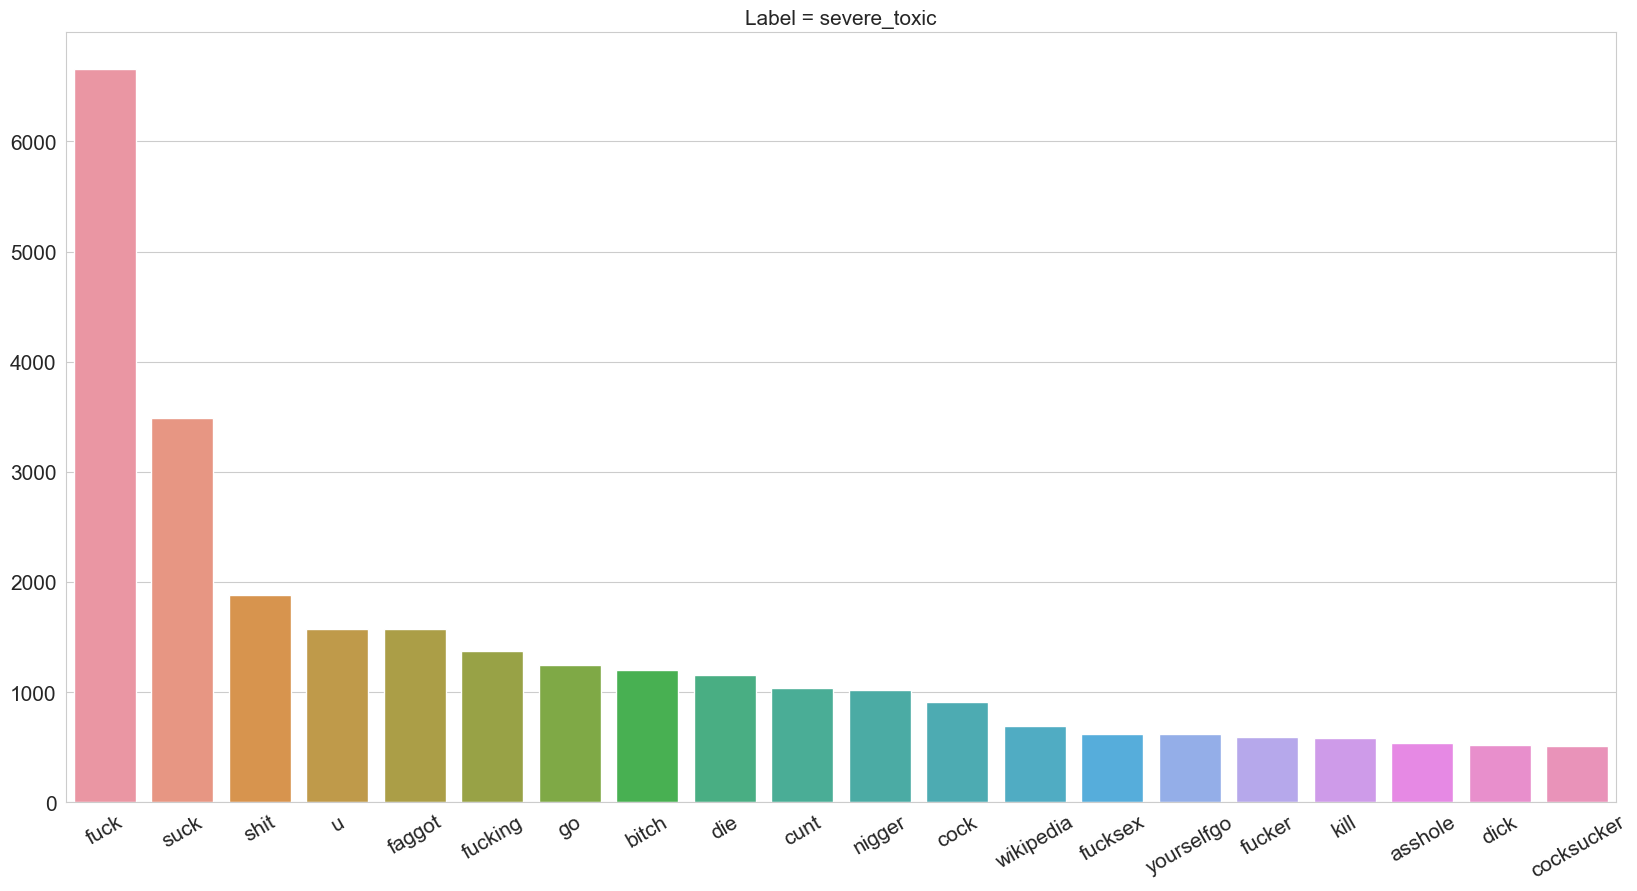

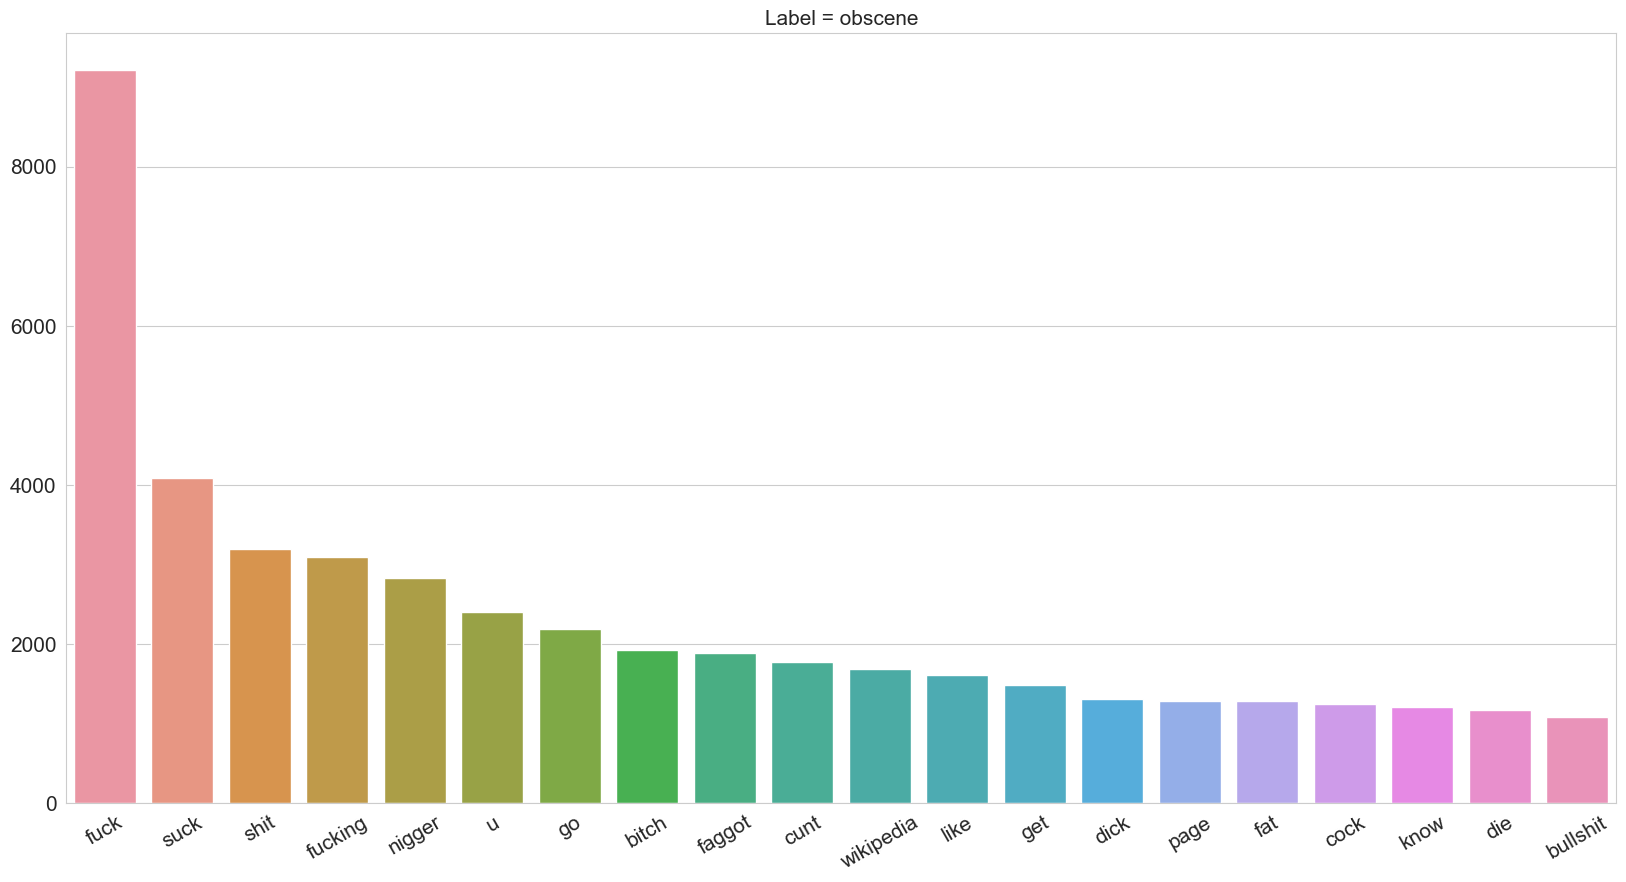

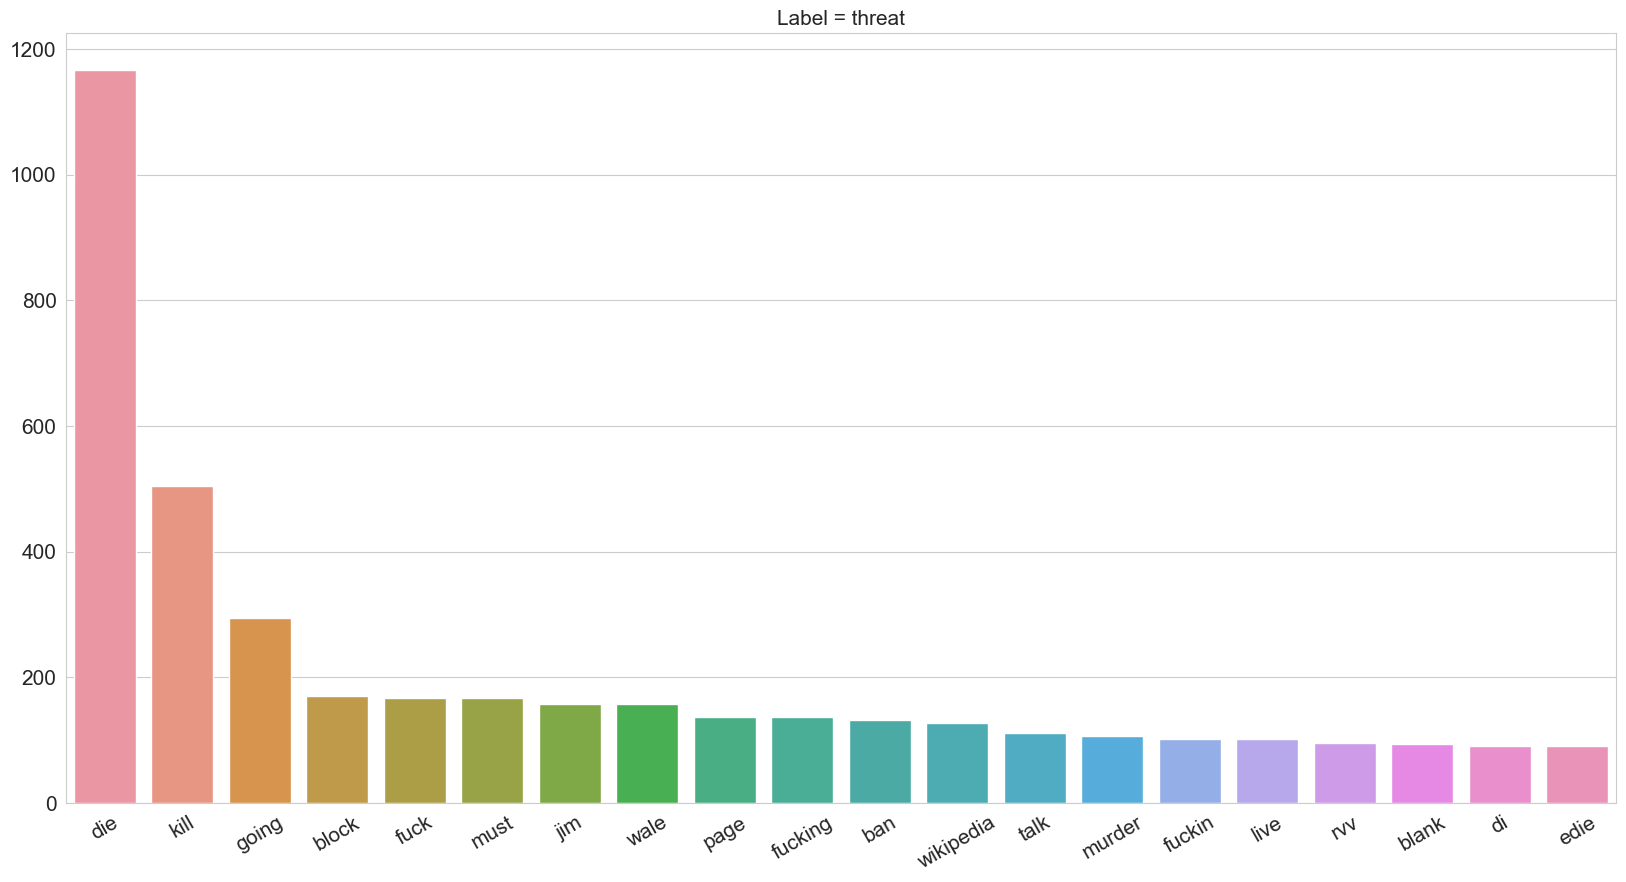

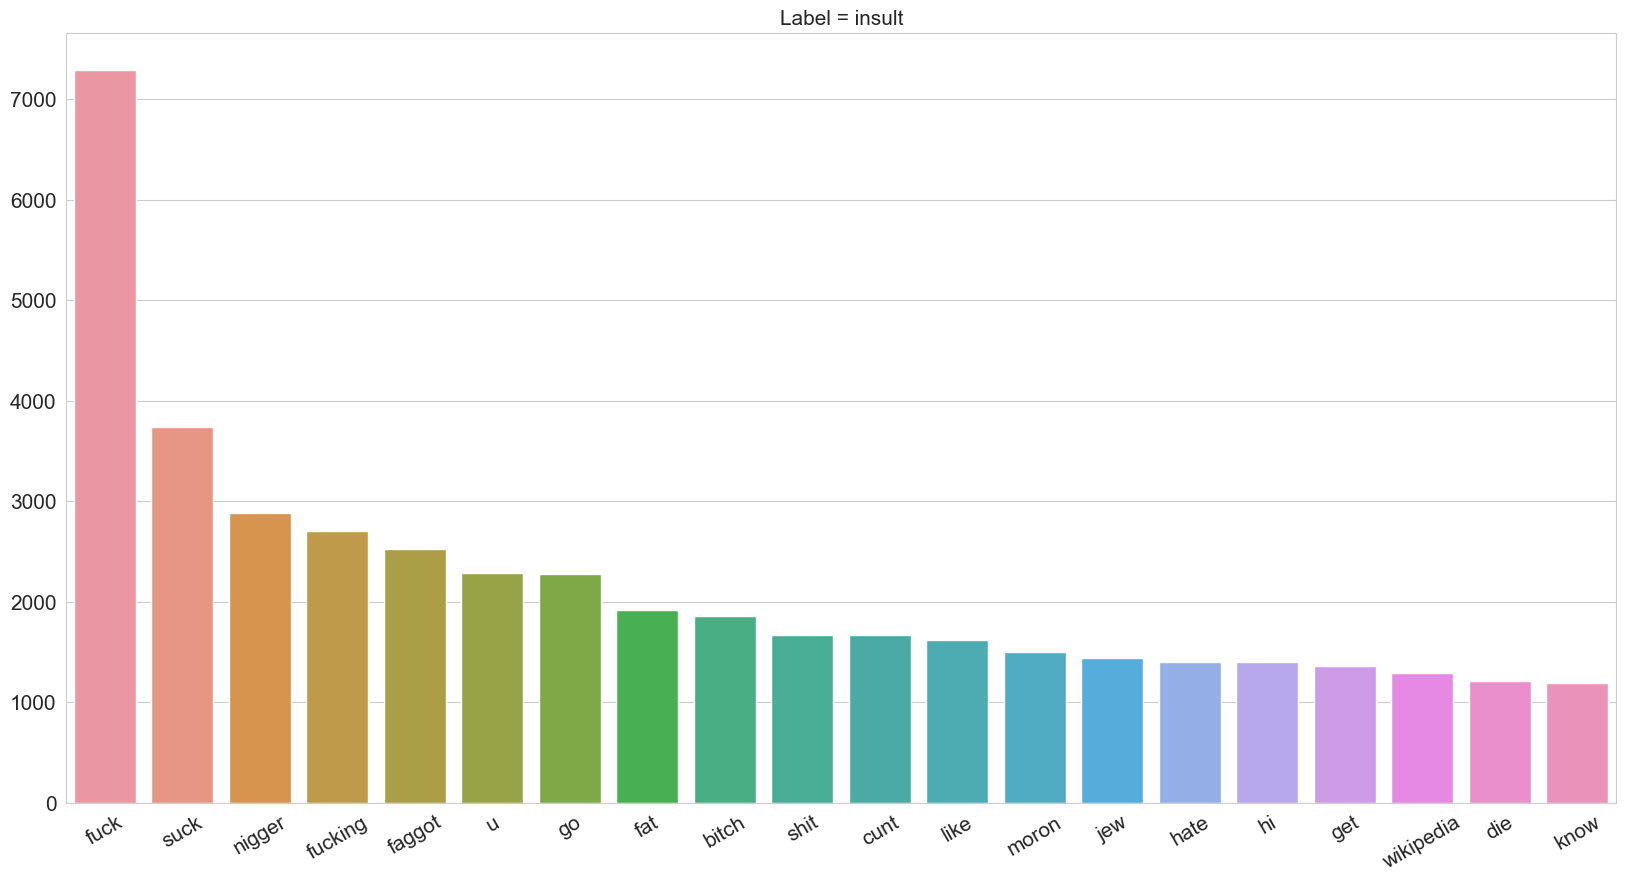

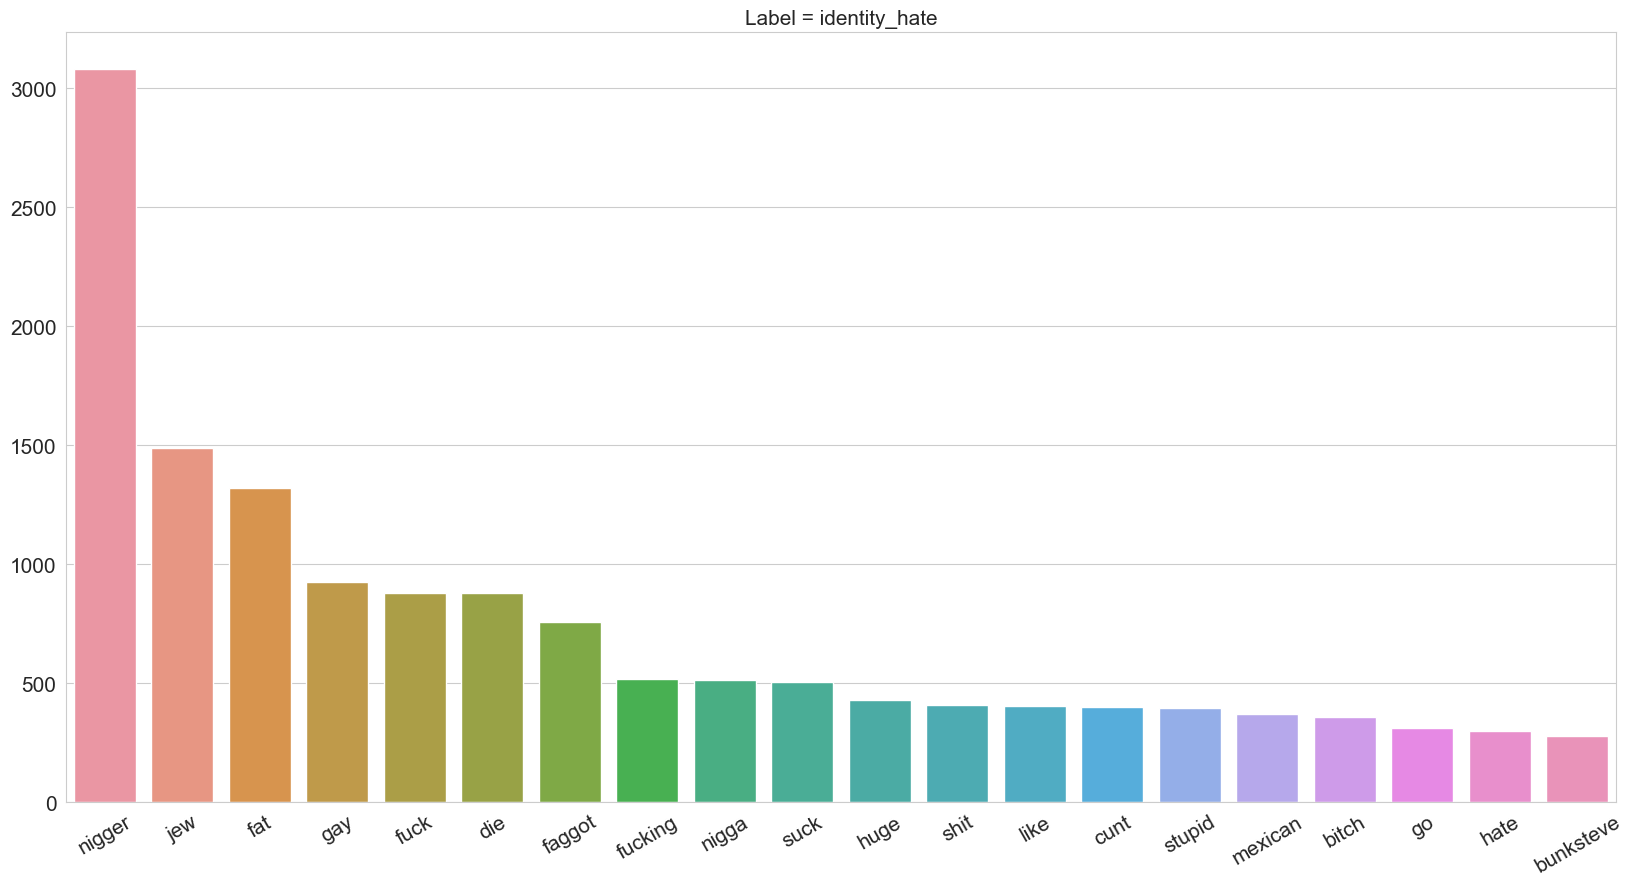

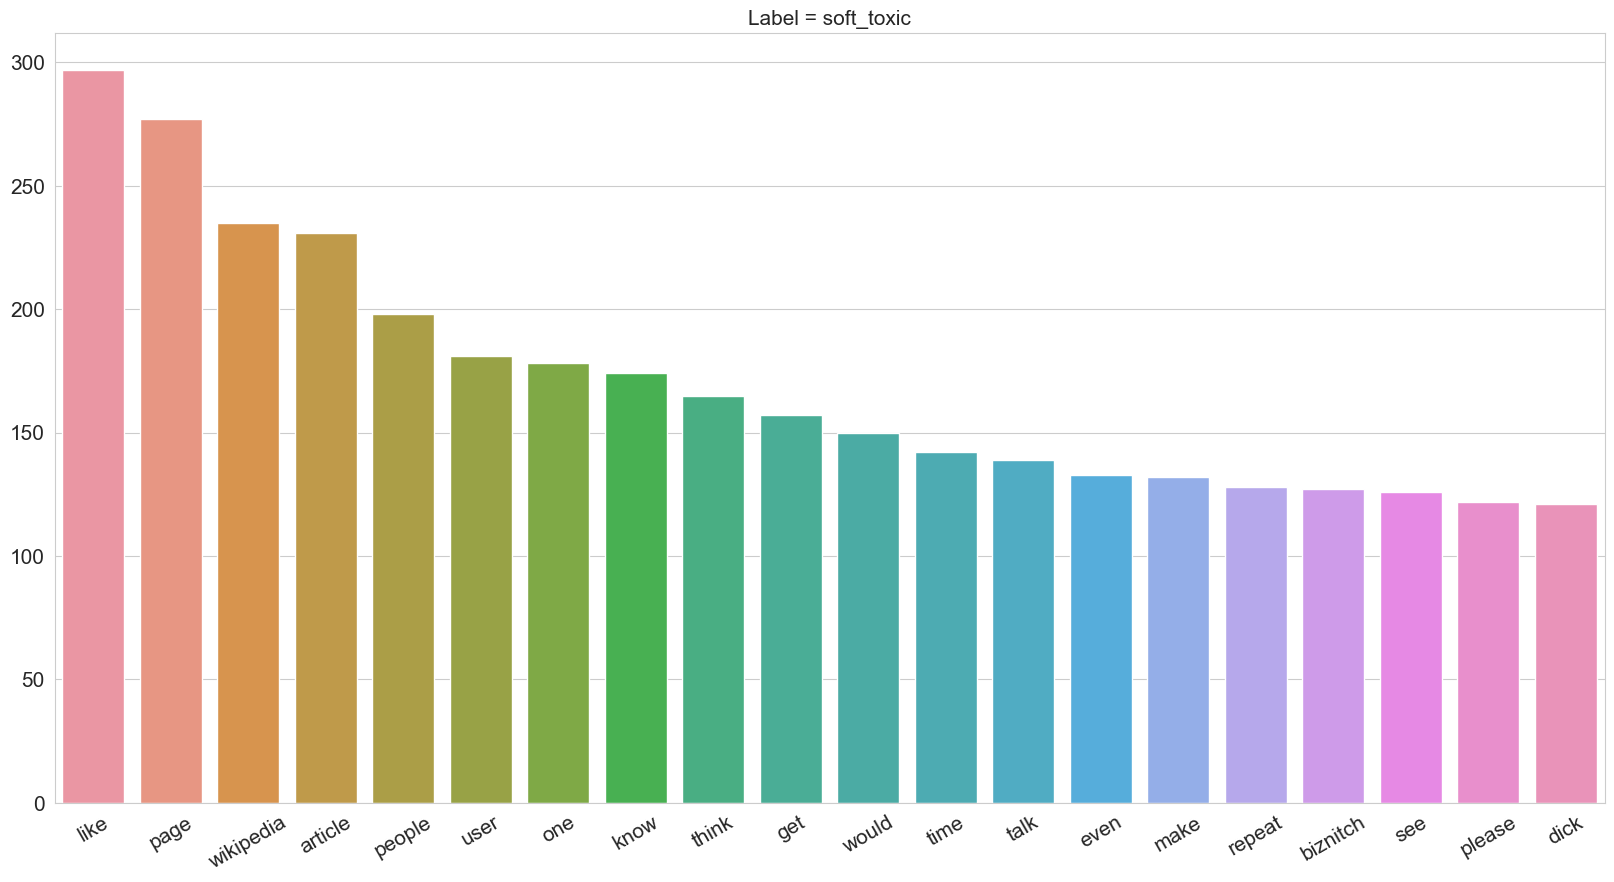

In [23]:
import collections
import seaborn as sns
import matplotlib.pyplot as plt

for label in target_columns:
    # Extract words for the current label where it is set to 1 and flatten the list
    word_list = list(train_balanced.loc[train_balanced[label] == 1, 'nonstop_tokens'].explode())
    
    # Find the 20 most common words and their counts
    most_common = collections.Counter(word_list).most_common(20)
    words = [w for w, _ in most_common]
    counts = [c for _, c in most_common]
    
    # Create a bar plot to visualize the most common words
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(x=words, y=counts)
    ax.set_title(f'Label = {label}', fontsize=15)  # Set the title for the plot
    ax.tick_params(labelsize=15)  # Adjust the size of the tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)  # Rotate x-axis labels for better readability

In [24]:
val_border = int(len(train_balanced)*0.6)
validation_set = train_balanced[val_border:].copy()

In [25]:
compare_set = ['toxic', 'insult', 'obscene']

In [28]:
vectorizer = TfidfVectorizer(ngram_range=(1, 5), max_features=5000)
vectorizer.fit(train_balanced['comment_text'])
vectorizer

TfidfVectorizer(max_features=5000, ngram_range=(1, 5))

In [29]:
x_train = vectorizer.transform(train_balanced['comment_text'])

In [30]:
x_train 

<31993x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1305695 stored elements in Compressed Sparse Row format>

In [31]:
# Calculate the sum of each label across all comments
label_counts = train_balanced[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

print("Label Distribution:")
print(label_counts)

Label Distribution:
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [32]:
x_train = vectorizer.transform(train_balanced['comment_text'])

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

# Define the custom tokenizer
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

# Define the TfidfVectorizer with the custom tokenizer
tfidf = TfidfVectorizer(max_features=200, tokenizer=tokenize, sublinear_tf=True, min_df=1,
                        norm='l2', encoding='utf-8', lowercase=False, ngram_range=(1, 2),
                        stop_words='english')

X = tfidf.fit_transform(train['comment_text'])
X_test = tfidf.transform(test['comment_text'])

c:\Users\anuli\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [34]:
COMMENT = 'comment_text'
train[COMMENT].fillna("unknown", inplace=True)
test[COMMENT].fillna("unknown", inplace=True)
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
num_classes = len(label_cols)
y_train = train[label_cols].values
print(num_classes)

6


In [35]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers
from collections import defaultdict
import gzip
import itertools

In [36]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Bidirectional, Activation, Conv1D, GRU
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, GlobalAveragePooling1D, SpatialDropout1D
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X, train[label_cols], test_size=0.2, random_state=42)

In [40]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

# Assuming you have X and train[label_cols] defined earlier
# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, train[label_cols], test_size=0.2, random_state=42)

# Parameters
vocab_size = X_train.shape[1]  # Number of features in the input data
embedding_dim = 100  # Size of the embedding vectors
max_length = X_train.shape[1]  # Maximum length of input sequences
num_classes = y_train.shape[1]  # Number of classes for classification (e.g., for multi-label classification)

# Define the LSTM model
def build_lstm_model(vocab_size, embedding_dim, max_length, num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build the model
lstm_model = build_lstm_model(vocab_size, embedding_dim, max_length, num_classes)

# Train the model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid), verbose=1)

c:\Users\anuli\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 1654s 412ms/step - accuracy: 0.8236 - loss: 0.1512 - val_accuracy: 0.9941 - val_loss: 0.1433
Epoch 2/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 2796s 701ms/step - accuracy: 0.9942 - loss: 0.1426 - val_accuracy: 0.9941 - val_loss: 0.1418
Epoch 3/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 1209s 303ms/step - accuracy: 0.9945 - loss: 0.1418 - val_accuracy: 0.9941 - val_loss: 0.1419
Epoch 4/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 1708s 425ms/step - accuracy: 0.9939 - loss: 0.1415 - val_accuracy: 0.9941 - val_loss: 0.1418
Epoch 5/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 979s 245ms/step - accuracy: 0.9942 - loss: 0.1433 - val_accuracy: 0.9941 - val_loss: 0.1425
Epoch 6/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 953s 239ms/step - accuracy: 0.9944 - loss: 0.1418 - val_accuracy: 0.9941 - val_loss: 0.1417
Epoch 7/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 917s 230ms/step - accuracy: 0.9939 - loss: 0.1415 - val_accuracy: 0.9941 - val_loss: 0.1417
Epoch 8/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 912s 229ms/step 

In [ ]:
# Make predictions on the validation set
lstm_probs = lstm_model.predict(X_valid)  # Probability scores
lstm_preds = (lstm_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

998/998 ━━━━━━━━━━━━━━━━━━━━ 87s 86ms/step


Class Distribution in Training Data:
               count
toxic          15294
obscene         8449
insult          7877
severe_toxic    1595
identity_hate   1405
threat           478


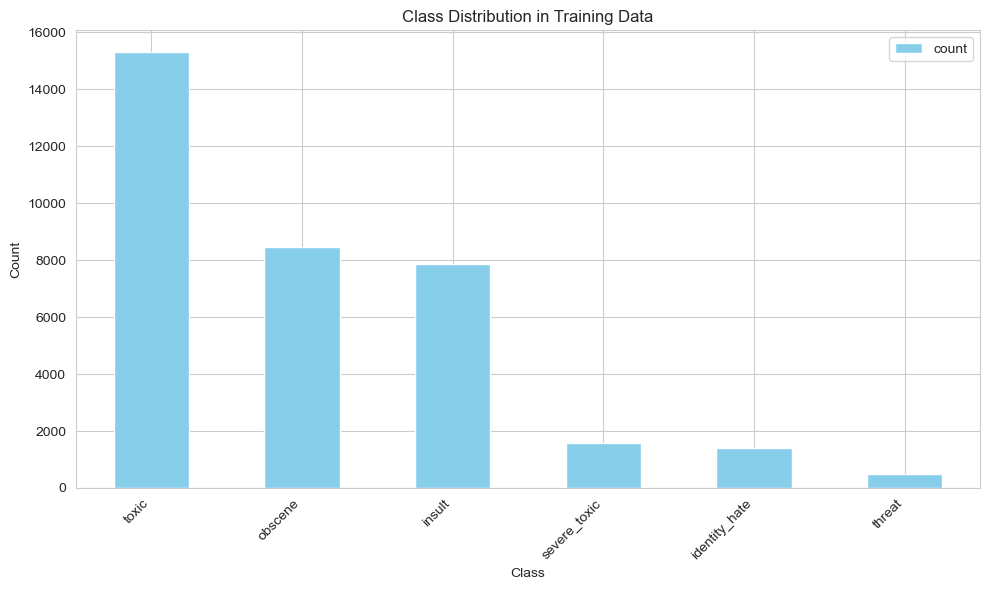

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `train` is your DataFrame containing the data
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Count the number of instances for each class
class_distribution = train[label_cols].sum()

# Create a DataFrame to store class distribution
class_distribution_df = pd.DataFrame(class_distribution, columns=['count'])

# Sort the DataFrame by count (descending) to identify the most frequent classes
class_distribution_df = class_distribution_df.sort_values(by='count', ascending=False)

# Print the class distribution DataFrame
print("Class Distribution in Training Data:")
print(class_distribution_df)

# Visualize the class distribution using a bar plot
plt.figure(figsize=(10, 6))
class_distribution_df.plot(kind='bar', ax=plt.gca(), color='skyblue')
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Make predictions on the validation set
lstm_preds = lstm_model.predict(X_valid)

# Convert probabilities to binary predictions (0 or 1)
lstm_preds = (lstm_preds >= 0.5).astype(int)

# Evaluate the LSTM model
print("LSTM Model Evaluation:")
print("Accuracy:", accuracy_score(y_valid, lstm_preds))
print("F1 Score:", f1_score(y_valid, lstm_preds, average='micro'))
print("Precision:", precision_score(y_valid, lstm_preds, average='micro'))
print("Recall:", recall_score(y_valid, lstm_preds, average='micro'))

998/998 ━━━━━━━━━━━━━━━━━━━━ 104s 105ms/step
LSTM Model Evaluation:
Accuracy: 0.898355005483315
F1 Score: 0.0
Precision: 0.0
Recall: 0.0


c:\Users\anuli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(lstm_preds)
print(y_valid)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
        toxic  severe_toxic  obscene  threat  insult  identity_hate
119105      0             0        0       0       0              0
131631      0             0        0       0       0              0
125326      0             0        0       0       0              0
111256      0             0        0       0       0              0
83590       0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
121162      0             0        0       0       0              0
34019       0             0        0       0       0              0
83938       0             0        0       0       0              0
78687       1             0        1       0       1              0
127984      0             0        0       0       0              0

[31915 rows x 6 columns]


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Define your label columns
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']  # Adjust as needed

# Convert y_valid DataFrame to a NumPy array if not already
y_valid_np = y_valid.values

# Initialize metrics summary dictionary
metrics_summary = {}

# Ensure `lstm_probs` and `lstm_preds` are defined and have the correct shape
# If you haven't defined them, make sure you have them from your LSTM model output
if 'lstm_probs' in locals() and 'lstm_preds' in locals():
    # Iterate over each label to calculate and store metrics
    for i, label in enumerate(label_cols):
        if i >= lstm_preds.shape[1]:  # Check if index is out of bounds
            print(f"Skipping label {label} due to index out of bounds.")
            continue

        # Get the predicted probabilities and binary predictions for the current class
        pred_probs = lstm_probs[:, i]  # Extract probabilities for the current class
        preds = lstm_preds[:, i]  # Extract binary predictions for the current class
        
        # Get the corresponding true labels from y_valid_np
        true_labels = y_valid_np[:, i]  # Extract true labels for the current class

        # Initialize metrics to handle cases where metrics might not be calculable
        roc_auc = precision = recall = f1 = accuracy = 0
        report = {}

        try:
            # Calculate metrics
            roc_auc = roc_auc_score(true_labels, pred_probs)
        except ValueError as e:
            print(f"ROC AUC calculation error for {label}: {e}")

        try:
            precision = precision_score(true_labels, preds, zero_division=0)
            recall = recall_score(true_labels, preds, zero_division=0)
            f1 = f1_score(true_labels, preds, zero_division=0)
            accuracy = accuracy_score(true_labels, preds)
            report = classification_report(true_labels, preds, output_dict=True)
        except (ValueError, UndefinedMetricWarning) as e:
            print(f"Error calculating metrics for {label}: {e}")

        # Store metrics in the dictionary
        metrics_summary[label] = {
            'ROC AUC': roc_auc,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy,
            'Classification Report': report
        }
        
        # Print metrics for each label
        print(f'Label = {label}')
        print(f'ROC AUC: {roc_auc}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1}')
        print(f'Accuracy: {accuracy}')
        print(f'Classification Report:\n{report}\n')

    # Convert metrics_summary to a DataFrame and save it
    metrics_df = pd.DataFrame(metrics_summary).T
else:
    print("Error: `lstm_probs` or `lstm_preds` is not defined.")

Label = toxic
ROC AUC: 0.5050640637390426
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.9042456525144916
Classification Report:
{'0': {'precision': 0.9042456525144916, 'recall': 1.0, 'f1-score': 0.9497153387961957, 'support': 28859}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3056}, 'accuracy': 0.9042456525144916, 'macro avg': {'precision': 0.4521228262572458, 'recall': 0.5, 'f1-score': 0.47485766939809787, 'support': 31915}, 'weighted avg': {'precision': 0.8176602000913588, 'recall': 0.9042456525144916, 'f1-score': 0.8587759662327875, 'support': 31915}}

Label = severe_toxic
ROC AUC: 0.5026257992516817
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.989942033526555
Classification Report:
{'0': {'precision': 0.989942033526555, 'recall': 1.0, 'f1-score': 0.9949455982616637, 'support': 31594}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 321}, 'accuracy': 0.989942033526555, 'macro avg': {'precision': 0.4949710167632775, 'recall': 

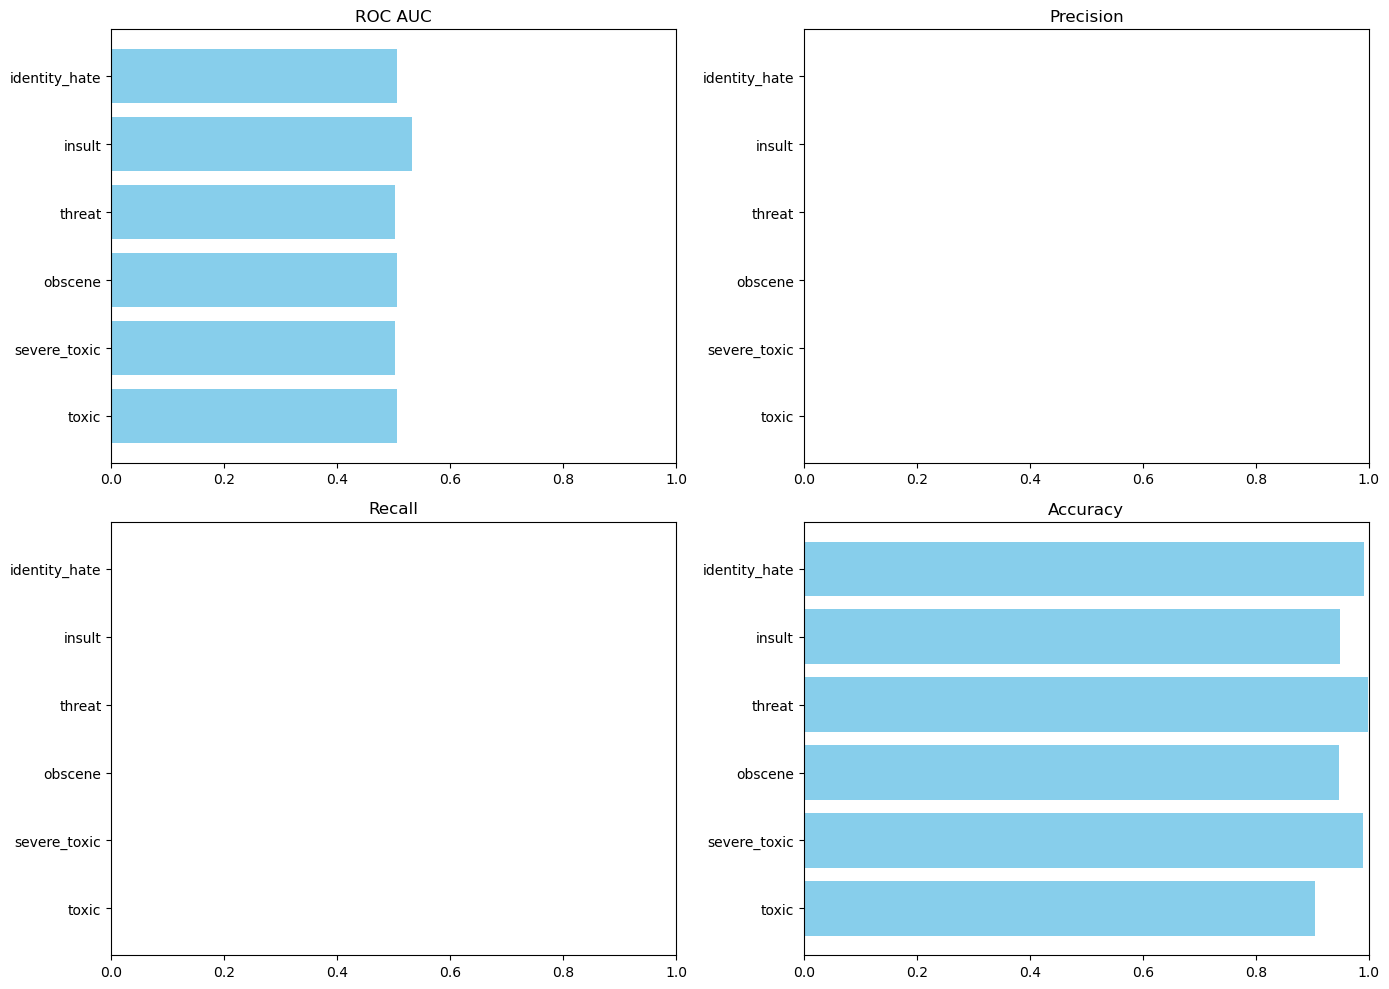

In [1]:
import matplotlib.pyplot as plt

# Define the labels and corresponding metrics
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
roc_auc_scores = [0.5050640637390426, 0.5026257992516817, 0.5055584828065568, 0.5027823272477221, 0.532297621031034, 0.5050640637390426]
precision_scores = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
recall_scores = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
f1_scores = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
accuracy_scores = [0.9042456525144916, 0.989942033526555, 0.9462635124549584, 0.997744424382493, 0.9493881029523746, 0.9907880307065643]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot ROC AUC
axs[0, 0].barh(labels, roc_auc_scores, color='skyblue')
axs[0, 0].set_title('ROC AUC')
axs[0, 0].set_xlim(0, 1)

# Plot Precision
axs[0, 1].barh(labels, precision_scores, color='salmon')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlim(0, 1)

# Plot Recall
axs[1, 0].barh(labels, recall_scores, color='salmon')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlim(0, 1)

# Plot Accuracy
axs[1, 1].barh(labels, accuracy_scores, color='skyblue')
axs[1, 1].set_title('Accuracy')
axs[1, 1].set_xlim(0, 1)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
print("lstm_preds shape:", lstm_preds.shape)
print("y_valid_np shape:", y_valid_np.shape)

lstm_preds shape: (31915, 6)
y_valid_np shape: (31915, 6)
